### loading academic papers

In [2]:
import pandas as pd
import numpy as np

In [3]:
df_1 = pd.read_csv('data/articles1.csv')

In [4]:
df_1

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."
...,...,...,...,...,...,...,...,...,...,...
49995,53287,73465,"Rex Tillerson Says Climate Change Is Real, but …",Atlantic,Robinson Meyer,2017-01-11,2017.0,1.0,NaN,"As chairman and CEO of ExxonMobil, Rex Tillers..."
49996,53288,73466,The Biggest Intelligence Questions Raised by t...,Atlantic,Amy Zegart,2017-01-11,2017.0,1.0,NaN,I’ve spent nearly 20 years looking at intellig...
49997,53289,73467,Trump Announces Plan That Does Little to Resol...,Atlantic,Jeremy Venook,2017-01-11,2017.0,1.0,NaN,Donald Trump will not be taking necessary st...
49998,53290,73468,Dozens of For-Profit Colleges Could Soon Close,Atlantic,Emily DeRuy,2017-01-11,2017.0,1.0,NaN,Dozens of colleges could be forced to close ...


In [5]:
titles = df_1['title'].array

papers = df_1['content'].array

In [6]:
titles[1]

'Rift Between Officers and Residents as Killings Persist in South Bronx - The New York Times'

In [7]:
papers[1]

'After the bullet shells get counted, the blood dries and the votive candles burn out, people peer down from   windows and see crime scenes gone cold: a band of yellow police tape blowing in the breeze. The South Bronx, just across the Harlem River from Manhattan and once shorthand for urban dysfunction, still suffers violence at levels long ago slashed in many other parts of New York City. And yet the city’s efforts to fight it remain splintered, underfunded and burdened by scandal. In the 40th Precinct, at the southern tip of the Bronx, as in other poor, minority neighborhoods across the country, people long hounded for   infractions are crying out for more protection against grievous injury or death. By September, four of every five shootings in the precinct this year were unsolved. Out of the city’s 77 precincts, the 40th has the highest murder rate but the fewest detectives per violent crime, reflecting disparities in staffing that hit hardest in some neighborhoods outside Manhatt

We perform some basic text wrangling or preprocessing before diving into topic modeling. We keep things simple here and perform tokenization, lemmatizing nouns, and removing stopwords and any terms having a single character.


In [8]:
%%time
import nltk

stop_words = nltk.corpus.stopwords.words('english')
wtk = nltk.tokenize.RegexpTokenizer(r'\w+')
wnl = nltk.stem.wordnet.WordNetLemmatizer()

def normalise_corpus(papers, titles):
    norm_papers = []
    pre_papers = []
    pre_titles = []
    for i in range(len(papers)):
        paper = papers[i]
        title = titles[i]
        
        paper = paper.lower()
        paper_tokens = [token.strip() for token in wtk.tokenize(paper)]
        paper_tokens = [wnl.lemmatize(token) for token in paper_tokens if not token.isnumeric()]
        paper_tokens = [token for token in paper_tokens if len(token) > 1]
        paper_tokens = [token for token in paper_tokens if token not in stop_words]
        paper_tokens = list(filter(None, paper_tokens))
        
        if paper_tokens:
            norm_papers.append(paper_tokens)
            pre_papers.append(paper)
            pre_titles.append(title)
            
    return norm_papers, pre_papers, pre_titles


def normalize_corpus(papers):
    norm_papers = []
    for paper in papers:
        paper = paper.lower()
        paper_tokens = [token.strip() for token in wtk.tokenize(paper)]
        paper_tokens = [wnl.lemmatize(token) for token in paper_tokens if not token.isnumeric()]
        paper_tokens = [token for token in paper_tokens if len(token) > 1]
        paper_tokens = [token for token in paper_tokens if token not in stop_words]
        paper_tokens = list(filter(None, paper_tokens))
        if paper_tokens:
            norm_papers.append(paper_tokens)
    return norm_papers


# norm_papers = normalize_corpus(papers)

norm_papers, pre_papers, pre_titles = normalise_corpus(papers, titles)

print(len(norm_papers))

49933
CPU times: user 2min 23s, sys: 763 ms, total: 2min 24s
Wall time: 2min 24s


### topic modelling with gensim

let’s get started by looking at ways to generate phrases with influential bi-grams and remove some terms that may not be useful before feature engineering.

In [9]:
import gensim

# higher threshold fewer phrases
bigram = gensim.models.Phrases(norm_papers, min_count=20, threshold=20, delimiter=b'_')

bigram_model = gensim.models.phrases.Phraser(bigram)
# sample demonstration
print(bigram_model[norm_papers[0]][:50])

['washington', 'congressional', 'republican', 'new', 'fear', 'come', 'health_care', 'lawsuit', 'obama_administration', 'might', 'win', 'incoming', 'trump', 'administration', 'could', 'choose', 'longer', 'defend', 'executive_branch', 'suit', 'challenge', 'administration', 'authority', 'spend', 'billion_dollar', 'health_insurance', 'subsidy', 'american', 'handing', 'house', 'republican', 'big', 'victory', 'issue', 'sudden', 'loss', 'disputed', 'subsidy', 'could_conceivably', 'cause', 'health_care', 'program', 'implode', 'leaving', 'million', 'people', 'without', 'access', 'health_insurance', 'republican']


We can clearly see that we have single words as well as bi-grams (two words separated by an underscore), which tells us that our model works. We leverage the min_count parameter , which tells us that our model ignores all words and bi-grams with total collected count lower than 20 across the corpus (of the input paper as a list of tokenized sentences). We also use a threshold of 20, which tells us that the model accepts specific phrases based on this threshold value so that a phrase of words a followed by b is accepted if the score of the phrase is greater than the threshold of 20.


Let’s generate phrases for all our tokenized research papers and build a vocabulary that will help us obtain a unique term/phrase to number mapping (since machine or deep learning only works on numeric tensors).

In [10]:
norm_corpus_bigrams = [bigram_model[doc] for doc in norm_papers]

# Create a dictionary representation of the documents.
dictionary = gensim.corpora.Dictionary(norm_corpus_bigrams)

print('Sample word to number mappings:', list(dictionary.items())[:15])
print('Total Vocabulary Size:', len(dictionary))

Sample word to number mappings: [(0, 'access'), (1, 'acknowledge'), (2, 'act'), (3, 'administration'), (4, 'advocate'), (5, 'affordable_care'), (6, 'ally'), (7, 'american'), (8, 'angering'), (9, 'annual'), (10, 'another'), (11, 'anticipated'), (12, 'anticipating'), (13, 'appeal'), (14, 'appealed')]
Total Vocabulary Size: 170226


Several of these terms are not very useful since they are specific to a paper or even a paragraph in a research paper. Hence, it is time to prune our vocabulary and start removing terms.

In [11]:
# Filter out words that occur less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=20, no_above=0.6)
print('Total Vocabulary Size:', len(dictionary))

Total Vocabulary Size: 33588


We removed all terms that occur fewer than 20 times across all documents and all terms that occur in more than 60% of all the documents. We are interested in finding different themes and topics and not recurring themes. Hence, this suits our scenario perfectly. We can now perform feature engineering by leveraging a simple Bag of Words model.


In [12]:
# Transforming corpus into bag of words vectors
bow_corpus = [dictionary.doc2bow(text) for text in norm_corpus_bigrams]
print(bow_corpus[1][:50])

[(0, 1), (4, 1), (6, 1), (10, 3), (21, 2), (31, 18), (32, 1), (34, 1), (39, 4), (40, 1), (45, 1), (57, 5), (59, 2), (64, 1), (66, 1), (68, 1), (81, 1), (84, 1), (85, 3), (88, 2), (90, 2), (93, 3), (97, 2), (99, 3), (100, 3), (102, 1), (109, 1), (110, 1), (112, 3), (116, 9), (124, 1), (136, 1), (138, 1), (140, 2), (141, 6), (142, 2), (143, 1), (148, 1), (157, 4), (159, 2), (160, 2), (162, 2), (163, 4), (165, 22), (167, 3), (168, 4), (171, 4), (177, 4), (180, 1), (181, 1)]


In [13]:
# viewing actual terms and their counts
print([(dictionary[idx] , freq) for idx, freq in bow_corpus[1][:50]])

[('access', 1), ('advocate', 1), ('ally', 1), ('another', 3), ('authority', 2), ('case', 18), ('cause', 1), ('challenge', 1), ('come', 4), ('comment', 1), ('confident', 1), ('could', 5), ('court', 2), ('decision', 1), ('defend', 1), ('desperate', 1), ('drop', 1), ('effect', 1), ('effort', 3), ('end', 2), ('era', 2), ('even_though', 3), ('fear', 2), ('fight', 3), ('find', 3), ('found', 1), ('given', 1), ('government', 1), ('handle', 3), ('house', 9), ('inclined', 1), ('judge', 1), ('lack', 1), ('late', 2), ('later', 6), ('law', 2), ('lawsuit', 1), ('leaving', 1), ('many', 4), ('may', 2), ('might', 2), ('money', 2), ('month', 4), ('mr', 22), ('never', 3), ('new', 4), ('office', 4), ('part', 4), ('paying', 1), ('payment', 1)]


Our documents are now processed and have a good enough representation with the Bag of Words model to begin modeling.

### LATENT DIRICHLET ALLOCATION WITH MALLET

The Latent Dirichlet Allocation (LDA) technique is a generative probabilistic model in which each document is assumed to have a combination of topics similar to a probabilistic Latent Semantic Indexing model.

The MALLET framework is a Java-based package for statistical natural language processing, document classification, clustering, topic modeling, information extraction, and other machine learning applications to text. MALLET stands for MAchine Learning for LanguagE Toolkit. It was developed by Andrew McCallum along with several people at the University of Massachusetts Amherst. The MALLET topic modeling toolkit contains efficient, sampling-based implementations of Latent Dirichlet Allocation, Pachinko Allocation, and Hierarchical LDA. To use MALLET’s capabilities, we need to download the framework.


In [14]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip

--2020-04-03 13:40:16--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  3.10MB/s    in 5.3s    

2020-04-03 13:40:22 (2.91 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]



In [15]:
!unzip -q mallet-2.0.8.zip

In [16]:
%%time

TOTAL_TOPICS = 10

MALLET_PATH = 'mallet-2.0.8/bin/mallet'
lda_mallet = gensim.models.wrappers.LdaMallet(mallet_path=MALLET_PATH, corpus=bow_corpus,
                                              num_topics=TOTAL_TOPICS, id2word=dictionary,
                                              iterations=500, workers=16)

topics = [[(term, round(wt, 3))
               for term, wt in lda_mallet.show_topic(n, topn=20)]
                   for n in range(0, TOTAL_TOPICS)]
for idx, topic in enumerate(topics):
    print('Topic #'+str(idx+1)+':')
    print([term for term, wt in topic])
    print()

Topic #1:
['mr', 'country', 'american', 'people', 'political', 'america', 'party', 'leader', 'nation', 'president', 'world', 'year', 'muslim', 'power', 'group', 'black', 'government', 'history', 'white', 'britain']

Topic #2:
['country', 'attack', 'government', 'military', 'united_state', 'official', 'isi', 'group', 'force', 'china', 'war', 'security', 'american', 'russia', 'syria', 'israel', 'iran', 'international', 'leader', 'terrorist']

Topic #3:
['city', 'people', 'home', 'day', 'time', 'water', 'building', 'area', 'back', 'new_york', 'place', 'hour', 'year', 'fire', 'part', 'space', 'house', 'resident', 'street', 'small']

Topic #4:
['president', 'law', 'official', 'white_house', 'administration', 'state', 'trump', 'case', 'decision', 'investigation', 'court', 'office', 'email', 'report', 'government', 'federal', 'statement', 'information', 'committee', 'public']

Topic #5:
['people', 'medium', 'news', 'time', 'thing', 'twitter', 'story', 'show', 'breitbart_news', 'facebook', 'in

### evaluating mallet model

In [17]:
cv_coherence_model_lda_mallet = gensim.models.CoherenceModel(model=lda_mallet,
                                              corpus=bow_corpus,
                                              texts=norm_corpus_bigrams,
                                              dictionary=dictionary,
                                              coherence='c_v')
avg_coherence_cv = cv_coherence_model_lda_mallet.get_coherence()
umass_coherence_model_lda_mallet = gensim.models.CoherenceModel(model=lda_mallet,
                                              corpus=bow_corpus,
                                              texts=norm_corpus_bigrams,
                                              dictionary=dictionary,
                                              coherence='u_mass')
avg_coherence_umass = umass_coherence_model_lda_mallet.get_coherence()

In [18]:
perplexity = -8.53533
print('Avg. Coherence Score (Cv):', avg_coherence_cv)
print('Avg. Coherence Score (UMass):', avg_coherence_umass)
print('Model Perplexity:', perplexity)

Avg. Coherence Score (Cv): 0.48510034680199954
Avg. Coherence Score (UMass): -1.5608310623836488
Model Perplexity: -8.53533


### LDA TUNING: FINDING THE OPTIMAL NUMBER OF TOPICS

Finding the optimal number of topics in a topic model is tough, given that it is like a model hyperparameter that you always have to set before training the model. We can use an iterative approach and build several models with differing numbers of topics and select the one that has the highest coherence score. To implement this method, we build the following function.

In [19]:
from tqdm import tqdm
def topic_model_coherence_generator(corpus, texts, dictionary,
                          start_topic_count=2, end_topic_count=10, step=1,
                                    cpus=1):
    models = []
    coherence_scores = []
    for topic_nums in tqdm(range(start_topic_count, end_topic_count+1, step)):
        mallet_lda_model = gensim.models.wrappers.LdaMallet(mallet_path=MALLET_PATH,
                                              corpus=corpus,
                                              num_topics=topic_nums,
                                              id2word=dictionary,
                                              iterations=500, workers=cpus)
        cv_coherence_model_mallet_lda = gensim.models.CoherenceModel(model=mallet_lda_model,
                                                    corpus=corpus,
                                                    texts=texts,
                                                    dictionary=dictionary,
                                                    coherence='c_v')
        coherence_score = cv_coherence_model_mallet_lda.get_coherence()
        coherence_scores.append(coherence_score)
        models.append(mallet_lda_model)
    return models, coherence_scores

In [20]:
lda_models, coherence_scores = topic_model_coherence_generator(corpus=bow_corpus,
                                                texts=norm_corpus_bigrams,
                                                dictionary=dictionary,
                                                start_topic_count=2,
                                                end_topic_count=30, step=1,
                                                cpus=16)

100%|██████████| 29/29 [3:37:00<00:00, 448.99s/it]  


In [21]:
coherence_df = pd.DataFrame({'Number of Topics': range(2, 31, 1),
                        'Coherence Score': np.round(coherence_scores, 4)})
coherence_df.sort_values(by=['Coherence Score'], ascending=False).head(10)

,Number of Topics,Coherence Score
24,26,0.5595
23,25,0.5558
28,30,0.5556
20,22,0.5453
22,24,0.5445
25,27,0.5444
17,19,0.5419
27,29,0.5411
26,28,0.5395
18,20,0.5390


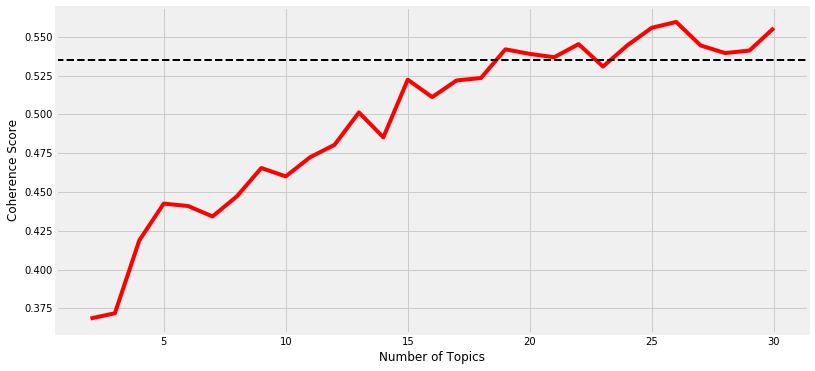

In [22]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline
x_ax = range(2, 31, 1)
y_ax = coherence_scores
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_ax, c="r")
plt.axhline(y=0.535, c="k", linestyle="--", linewidth=2)
plt.rcParams['figure.facecolor'] = 'white'
xl = plt.xlabel('Number of Topics')
yl = plt.ylabel('Coherence Score')

In [23]:
best_model_idx = coherence_df[coherence_df['Number of Topics'] == 20].index[0]
best_lda_model = lda_models[best_model_idx]
best_lda_model.num_topics

20

### checking topics

In [24]:
topics = [[(term, round(wt, 3))
               for term, wt in best_lda_model.show_topic(n, topn=20)]
                   for n in range(0, best_lda_model.num_topics)]
for idx, topic in enumerate(topics):
    print('Topic #'+str(idx+1)+':')
    print([term for term, wt in topic])
    print()

Topic #1:
['woman', 'people', 'student', 'black', 'school', 'university', 'group', 'white', 'community', 'protest', 'public', 'college', 'education', 'event', 'protester', 'men', 'activist', 'matter', 'movement', 'gay']

Topic #2:
['study', 'health', 'year', 'dr', 'drug', 'people', 'found', 'case', 'research', 'patient', 'doctor', 'number', 'risk', 'problem', 'test', 'report', 'medical', 'data', 'result', 'treatment']

Topic #3:
['company', 'million', 'year', 'business', 'money', 'job', 'market', 'billion', 'worker', 'percent', 'cost', 'industry', 'pay', 'price', 'tax', 'bank', 'employee', 'sale', 'financial', 'plan']

Topic #4:
['people', 'thing', 'make', 'time', 'good', 'lot', 'work', 'kind', 'back', 'idea', 'thought', 'feel', 'question', 'find', 'point', 'give', 'big', 'doe', 'put', 'great']

Topic #5:
['statement', 'day', 'meeting', 'friday', 'israel', 'thursday', 'wednesday', 'deal', 'monday', 'time', 'decision', 'added', 'announced', 'told', 'tuesday', 'official', 'week', 'made',

A better way of visualizing the topics is to build a term-topic dataframe.

In [25]:
topics_df = pd.DataFrame([[term for term, wt in topic]
                              for topic in topics],
                         columns = ['Term'+str(i) for i in range(1, 21)],
                         index=['Topic '+str(t) for t in range(1, best_lda_model.num_topics+1)]).T
topics_df

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11,Topic 12,Topic 13,Topic 14,Topic 15,Topic 16,Topic 17,Topic 18,Topic 19,Topic 20
Term1,woman,study,company,people,statement,mr,show,state,city,twitter,trump,official,military,trump,republican,police,muslim,family,show,game
Term2,people,health,million,thing,day,percent,time,law,water,news,clinton,trump,government,president,bill,officer,attack,child,film,team
Term3,student,year,year,make,meeting,party,cnn,case,people,medium,campaign,investigation,china,obama,democrat,man,country,life,year,player
Term4,black,dr,business,time,friday,election,told,court,area,facebook,donald_trump,email,isi,american,house,gun,people,home,movie,year
Term5,school,drug,money,good,israel,state,network,federal,building,video,hillary_clinton,president,force,country,senate,victim,government,woman,book,time
Term6,university,people,job,lot,thursday,voter,year,immigration,home,story,candidate,russia,official,america,vote,shooting,europe,told,star,world
Term7,group,found,market,work,wednesday,vote,week,judge,fire,time,republican,clinton,syria,policy,plan,city,migrant,day,actor,win
Term8,white,case,billion,kind,deal,poll,interview,united_state,resident,social_medium,cruz,russian,country,united_state,congress,authority,britain,father,art,sport
Term9,community,research,worker,back,monday,political,host,order,day,article,sander,report,united_state,white_house,state,killed,european,friend,character,final
Term10,protest,patient,percent,idea,time,campaign,fox_news,legal,space,online,rubio,white_house,war,donald_trump,ryan,reported,french,mother,new_york,play


Another easy way to view the topics is to create a topic-term dataframe, whereby each topic is represented in a row with the terms of the topic being represented as a comma-separated string.

In [26]:
pd.set_option('display.max_colwidth', -1)
topics_df = pd.DataFrame([', '.join([term for term, wt in topic])
                              for topic in topics],
                         columns = ['Terms per Topic'],
                         index=['Topic'+str(t) for t in range(1, best_lda_model.num_topics+1)]
                         )
topics_df

,Terms per Topic
Topic1,"woman, people, student, black, school, university, group, white, community, protest, public, college, education, event, protester, men, activist, matter, movement, gay"
Topic2,"study, health, year, dr, drug, people, found, case, research, patient, doctor, number, risk, problem, test, report, medical, data, result, treatment"
Topic3,"company, million, year, business, money, job, market, billion, worker, percent, cost, industry, pay, price, tax, bank, employee, sale, financial, plan"
Topic4,"people, thing, make, time, good, lot, work, kind, back, idea, thought, feel, question, find, point, give, big, doe, put, great"
Topic5,"statement, day, meeting, friday, israel, thursday, wednesday, deal, monday, time, decision, added, announced, told, tuesday, official, week, made, leader, comment"
Topic6,"mr, percent, party, election, state, voter, vote, poll, political, campaign, support, lead, result, year, point, republican, democrat, time, candidate, recent"
Topic7,"show, time, cnn, told, network, year, week, interview, host, fox_news, season, back, team, fox, news, tv, smith, thing, veteran, kelly"
Topic8,"state, law, case, court, federal, immigration, judge, united_state, order, legal, texas, government, country, mexico, lawyer, decision, immigrant, refugee, official, policy"
Topic9,"city, water, people, area, building, home, fire, resident, day, space, flight, park, local, new_york, road, time, street, plane, hour, car"
Topic10,"twitter, news, medium, facebook, video, story, time, social_medium, article, online, website, user, post, breitbart_news, breitbart, site, tweet, internet, google, journalist"


### interpreting results

In [28]:
tm_results = best_lda_model[bow_corpus]

In [29]:
corpus_topics = [sorted(topics, key=lambda record: -record[1])[0]
                     for topics in tm_results]
corpus_topics[:5]

[(14, 0.3604182413706224),
 (15, 0.4327141558736651),
 (18, 0.3644423460287483),
 (18, 0.3497964559386973),
 (12, 0.5067632850241546)]

In [31]:
corpus_topic_df = pd.DataFrame()
corpus_topic_df['Document'] = range(0, len(pre_papers))
corpus_topic_df['Dominant Topic'] = [item[0]+1 for item in corpus_topics]
corpus_topic_df['Contribution %'] = [round(item[1]*100, 2) for item in corpus_topics]
corpus_topic_df['Topic Desc'] = [topics_df.iloc[t[0]]['Terms per Topic'] for t in corpus_topics]
corpus_topic_df['Title'] = pre_titles
corpus_topic_df['Paper'] = pre_papers


In [32]:
pd.set_option('display.max_colwidth', 200)

topic_stats_df = corpus_topic_df.groupby('Dominant Topic').agg({
                                                'Dominant Topic': {
                                                    'Doc Count': np.size,
                                                    '% Total Docs': np.size }
                                              })
topic_stats_df = topic_stats_df['Dominant Topic'].reset_index()
topic_stats_df['% Total Docs'] = topic_stats_df['% Total Docs'].apply(lambda row: round((row*100) / len(papers), 2))
topic_stats_df['Topic Desc'] = [topics_df.iloc[t]['Terms per Topic'] for t in range(len(topic_stats_df))]
topic_stats_df

/Users/alex.nim@ibm.com/opt/anaconda3/lib/python3.7/site-packages/pandas/core/groupby/generic.py:1455: FutureWarning: using a dict with renaming is deprecated and will be removed
in a future version.

For column-specific groupby renaming, use named aggregation

    >>> df.groupby(...).agg(name=('column', aggfunc))

  return super().aggregate(arg, *args, **kwargs)


,Dominant Topic,Doc Count,% Total Docs,Topic Desc
0,1,2239,4.48,"woman, people, student, black, school, university, group, white, community, protest, public, college, education, event, protester, men, activist, matter, movement, gay"
1,2,1569,3.14,"study, health, year, dr, drug, people, found, case, research, patient, doctor, number, risk, problem, test, report, medical, data, result, treatment"
2,3,3848,7.70,"company, million, year, business, money, job, market, billion, worker, percent, cost, industry, pay, price, tax, bank, employee, sale, financial, plan"
3,4,1476,2.95,"people, thing, make, time, good, lot, work, kind, back, idea, thought, feel, question, find, point, give, big, doe, put, great"
4,5,814,1.63,"statement, day, meeting, friday, israel, thursday, wednesday, deal, monday, time, decision, added, announced, told, tuesday, official, week, made, leader, comment"
5,6,1564,3.13,"mr, percent, party, election, state, voter, vote, poll, political, campaign, support, lead, result, year, point, republican, democrat, time, candidate, recent"
6,7,1472,2.94,"show, time, cnn, told, network, year, week, interview, host, fox_news, season, back, team, fox, news, tv, smith, thing, veteran, kelly"
7,8,2298,4.60,"state, law, case, court, federal, immigration, judge, united_state, order, legal, texas, government, country, mexico, lawyer, decision, immigrant, refugee, official, policy"
8,9,2715,5.43,"city, water, people, area, building, home, fire, resident, day, space, flight, park, local, new_york, road, time, street, plane, hour, car"
9,10,2351,4.70,"twitter, news, medium, facebook, video, story, time, social_medium, article, online, website, user, post, breitbart_news, breitbart, site, tweet, internet, google, journalist"


The results show us that most of the papers cover topics of probabilistic models and Bayesian modeling (Topic #8), followed by papers covering modeling and simulating how the brain works with neurons, cells, stimulus, and connections (Topic #10). Even Topic #14, covering reinforcement learning and robotics, has almost 6.32% representation of the total number of papers. This tells us it’s not a new thing and people have been researching it for decades!

### document most dominant topic with highest contribution %

In [33]:
corpus_topic_df.sort_values(by='Contribution %', ascending=False)

,Document,Dominant Topic,Contribution %,Topic Desc,Title,Paper
48617,48617,16,82.06,"police, officer, man, gun, victim, shooting, city, authority, killed, reported, police_officer, suspect, arrested, shot, incident, video, prison, death, report, charge",Here are all the police killings since just the beginning of September,"’’ ’police violence against civilians, particularly black men, has once again drawn national scrutiny following the fatal shootings of terence crutcher, 40, in tulsa, oklahoma, on september 16; ke..."
35102,35102,12,79.11,"official, trump, investigation, email, president, russia, clinton, russian, report, white_house, information, campaign, intelligence, fbi, comey, committee, time, document, government, question",The Russia investigation: Everything you need to know,"washington (cnn) after months of dramatic congressional testimony, bombshell news reports and partisan jousting, the saga about alleged russian tampering in the 2016 presidential election and in..."
42919,42919,2,77.62,"study, health, year, dr, drug, people, found, case, research, patient, doctor, number, risk, problem, test, report, medical, data, result, treatment",New saliva test may catch Alzheimer’s disease,"(cnn) a test detecting alzheimer’s disease early may become easily available thanks to one plentiful bodily substance: saliva, a recently released study shows. the saliva test was presented at th..."
3325,3325,20,77.48,"game, team, player, year, time, world, win, sport, final, play, back, point, day, top, set, match, athlete, made, event, season",Henrik Stenson Beats Phil Mickelson in British Open Duel - The New York Times,"troon, scotland — phil mickelson had turned back the clock for a fourth consecutive day. he had made a birdie on the opening hole of sunday’s final round at the 2016 british open and never look..."
1072,1072,19,77.29,"show, film, year, movie, book, star, actor, art, character, new_york, music, work, song, love, artist, story, world, series, made, hollywood",Grammy Winners 2017 - The New York Times,"the complete list of winners: record of the year “hello” — adele album of the year “25” — adele (read our review) song of the year “hello” — adele adkins greg kurstin, songwriters (adele..."
...,...,...,...,...,...,...
27359,27359,6,5.56,"mr, percent, party, election, state, voter, vote, poll, political, campaign, support, lead, result, year, point, republican, democrat, time, candidate, recent",Marine Barred from Graduation Ceremony for Wearing Uniform Instead of Cap and Gown - Breitbart,advertisement
23914,23914,7,5.56,"show, time, cnn, told, network, year, week, interview, host, fox_news, season, back, team, fox, news, tv, smith, thing, veteran, kelly",AP: Stunned GOP Establishment Loses Hope in Iowa and NH - Breitbart,advertisement
30319,30319,6,5.56,"mr, percent, party, election, state, voter, vote, poll, political, campaign, support, lead, result, year, point, republican, democrat, time, candidate, recent","Obama Vetoes 9/11 Bill, Defends Saudi Arabia from Lawsuits - Breitbart",advertisement
46331,46331,5,5.34,"statement, day, meeting, friday, israel, thursday, wednesday, deal, monday, time, decision, added, announced, told, tuesday, official, week, made, leader, comment",The chair of the joint chiefs of staff told us the biggest lesson he’s learned in the fight against ISIS,’washington — the us has been able to. ..’


### Dominant Topics in Specific Research Papers
Another interesting perspective is to select specific papers, view the most dominant topic in each of those papers, and see if that makes sense.

In [34]:
pd.set_option('display.max_colwidth', 200)
(corpus_topic_df[corpus_topic_df['Document']
                 .isin([681, 9, 392, 1622, 17,
                        906, 996, 503, 13, 733])])

,Document,Dominant Topic,Contribution %,Topic Desc,Title,Paper
9,9,18,45.96,"family, child, life, home, woman, told, day, father, friend, mother, year, time, son, parent, wife, girl, daughter, boy, back, church",Calling on Angels While Enduring the Trials of Job - The New York Times,"angels are everywhere in the muñiz family’s apartment in the bronx: paintings of angels on the wall, ceramic angels flanking the ancient vcr, angels strumming lyres or blowing little golden trumpe..."
13,13,4,45.00,"people, thing, make, time, good, lot, work, kind, back, idea, thought, feel, question, find, point, give, big, doe, put, great",How to form healthy habits in your 20s - The New York Times,this article is part of a series aimed at helping you navigate life’s opportunities and challenges. what else should we write about? contact us: smarterliving@nytimes. com. when you woke up this m...
17,17,3,31.57,"company, million, year, business, money, job, market, billion, worker, percent, cost, industry, pay, price, tax, bank, employee, sale, financial, plan","Modi’s Cash Ban Brings Pain, but Corruption-Weary India Grits Its Teeth - The New York Times","mumbai, india — it was a bold and risky gamble by prime minister narendra modi of india that quickly seemed to backfire. the announcement of a ban on the largest currency bills circulating in i..."
392,392,3,38.76,"company, million, year, business, money, job, market, billion, worker, percent, cost, industry, pay, price, tax, bank, employee, sale, financial, plan","By Announcing New Jobs, Corporations Help Themselves Too - The New York Times","donald j. trump won’t be sworn in until friday but big business has already thrown him a veritable inaugural ball. a series of companies, among them ford, lockheed martin, amazon and sprint, hav..."
503,503,15,43.29,"republican, bill, democrat, house, senate, vote, plan, congress, state, ryan, president, conservative, senator, law, people, american, support, member, act, health_care",G.O.P. Senators Hope to Speed Trump Cabinet Confirmations - The New York Times,"washington — senate republicans will move this week to speed the confirmation of president trump’s cabinet, an effort that has been stymied by the combination of lax preparation by mr. trump’s ..."
681,681,18,18.40,"family, child, life, home, woman, told, day, father, friend, mother, year, time, son, parent, wife, girl, daughter, boy, back, church",Duterte’s Free Birth-Control Order Is Latest Skirmish With Catholic Church - The New York Times,"manila — when lizel torreras, 35, became pregnant with her third child, she mixed a tincture of bitter herbs and mahogany bark, a home remedy said to induce abortion. her husband, who worked as..."
733,733,6,29.80,"mr, percent, party, election, state, voter, vote, poll, political, campaign, support, lead, result, year, point, republican, democrat, time, candidate, recent",Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times,"paris — france chose an idealistic, traditional candidate in sunday’s primary to represent the socialist and parties in the presidential election this spring. the candidate, benoît hamon, 4..."
906,906,13,18.10,"military, government, china, isi, force, official, syria, country, united_state, war, iran, attack, group, russia, north_korea, chinese, american, killed, syrian, iraq",Cyprus Fears Russian Meddling in Its Settlement Talks - The New York Times,"nicosia, cyprus — as the united nations geared up for negotiations that it declared the “best and last chance” to unite cyprus after more than four decades of acrimonious division, russia’s amb..."
996,996,19,28.23,"show, film, year, movie, book, star, actor, art, character, new_york, music, work, song, love, artist, story, world, series, made, hollywood",Mother Jones Is Named Magazine of the Year - The New York Times,"mother jones was named magazine of the year on tuesday for finding “new ways to engage audiences and continue its practice of fearless journa

Papers on reinforcement learning, signal processing, gaussian mixture models, processor simulations, word recognitions, and many more have corresponding relevant topics as the most dominant topics. This tells us that our topic model is working well.

### Relevant Research Papers per Topic Based on Dominance
A better way of representation is to try to retrieve the corresponding research paper that has the highest representation for each of the 20 topics.

In [35]:
corpus_topic_df.groupby('Dominant Topic').apply(lambda topic_set:
                                            (topic_set.sort_values(by=['Contribution %'],
                                                   ascending=False).iloc[0]))

,Document,Dominant Topic,Contribution %,Topic Desc,Title,Paper
Dominant Topic,,,,,,
1,12476,1,53.60,"woman, people, student, black, school, university, group, white, community, protest, public, college, education, event, protester, men, activist, matter, movement, gay",Students Claim Objective ’Truth’ Is a ’White Supremacist’ Myth - Breitbart,students at the claremont mckenna colleges argued that objective truth is a social construct devised by “white supremacists” to “attempt to silence oppressed peoples” in a letter to the pomona col...
2,42919,2,77.62,"study, health, year, dr, drug, people, found, case, research, patient, doctor, number, risk, problem, test, report, medical, data, result, treatment",New saliva test may catch Alzheimer’s disease,"(cnn) a test detecting alzheimer’s disease early may become easily available thanks to one plentiful bodily substance: saliva, a recently released study shows. the saliva test was presented at th..."
3,46584,3,73.12,"company, million, year, business, money, job, market, billion, worker, percent, cost, industry, pay, price, tax, bank, employee, sale, financial, plan",IBM beats on earnings as revenue drops for 16 consecutive quarters,"’’ ”ibm just reported its and we’re looking through them now.” ’it reported q1 earnings per share at $2. 35 a share vs. expectations of $2. 09 a share.’ ’revenue of $18. 68 billion was reported, ..."
4,7287,4,69.67,"people, thing, make, time, good, lot, work, kind, back, idea, thought, feel, question, find, point, give, big, doe, put, great",Tips to Reduce Food Waste - The New York Times,"being a better cook is more than mastering recipes. it’s also getting the most from your food, wasting little and repurposing leftovers in creative, even ingenious ways. below, food reporters and ..."
5,23950,5,70.81,"statement, day, meeting, friday, israel, thursday, wednesday, deal, monday, time, decision, added, announced, told, tuesday, official, week, made, leader, comment",Ann Coulter: President Trump’s First 100 Days,"well, that was the easy part. all trump had to do was vanquish people too stupid to pick up the bill lying on the sidewalk — smug, smirking, establishment drones. [now comes the part ameri..."
6,6992,6,66.73,"mr, percent, party, election, state, voter, vote, poll, political, campaign, support, lead, result, year, point, republican, democrat, time, candidate, recent","This Time, There Really Is a Hispanic Voter Surge - The New York Times","hispanic voters were largely credited with president obama’s victory in 2012, but they weren’t as crucial as many believed. mr. obama didn’t even need to win the hispanic vote to put him over th..."
7,49734,7,64.76,"show, time, cnn, told, network, year, week, interview, host, fox_news, season, back, team, fox, news, tv, smith, thing, veteran, kelly",NFL POWER RANKINGS: Where all 32 teams stand heading into Week 16,"’’ ’with just two weeks of regular season football remaining, the playoff picture is finally starting to gain some clarity.’ ’four teams have already clinched: the patriots, raiders, cowboys, and ..."
8,31403,8,66.71,"state, law, case, court, federal, immigration, judge, united_state, order, legal, texas, government, country, mexico, lawyer, decision, immigrant, refugee, official, policy",Upheld: ID Theft Laws Used by Sheriff Arpaio to Prosecute Illegal Aliens,a federal district court judge in arizona has upheld two identity theft laws used to prosecute illegal aliens in employment raids by maricopa county sheriff joe arpaio. [the case involves the cons...
9,37404,9,71.65,"city, water, people, area, building, home, fire, resident, day, space, flight, park, local, new_york, road, time, street, plane, hour, car",Hurricane Hermine nears landfall in Florida Panhandle,"apalachicola, florida (cnn) after boarding up windows and filling sandbags, residents took shelter thursday night as hurricane hermine bore down on the sunshine state’s panhandle region. some coun..."


Based on the paper titles and the corresponding topics depicted in Figure 6-12, they do make sense. It looks like our model has captured the relevant latent patterns and themes in our corpus.